# A remarkable periodic solution of the 3-body problem with equal masses

In 2000 Alain Chenciner and Richard Montgomery published a [paper](https://arxiv.org/abs/math/0011268) about the discovery a new periodic solution of the 3-body problem.

In this peculiar configuration, the 3 bodies (of equal masses) orbit each other forming an 8-shaped curved which was shown to be stable.

In this Jupyter notebook, a quick and simple visualization of this 3-body problem solution is presented. We will use a simple numerical integrator from Scipy

## Setting up the initial conditions

In [1]:
import numpy as np
# Starting positions on the XY plane
p1 = np.array([0.97000436, -0.24308753])
p2 = -p1
p3 = np.zeros(2)

In [2]:
# Starting velocities
v3 = np.array([-0.93240737, -0.86473146])
v1 = -0.5*v3
v2 = v1

In [3]:
# Initial vector state 
x0 = np.concatenate((p1, p2, p3, v1, v2, v3))

## Plot initial positions

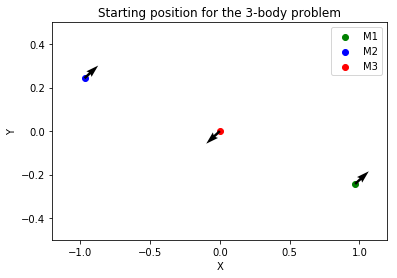

In [4]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('Starting position for the 3-body problem')
plt.scatter(p1[0], p1[1], color='green', label='M1')
plt.quiver(p1[0], p1[1], v1[0], v1[1])
plt.scatter(p2[0], p2[1], color='blue', label='M2')
plt.quiver(p2[0], p2[1], v2[0], v2[1])
plt.scatter(p3[0], p3[1], color='red', label='M3')
plt.quiver(p3[0], p3[1], v3[0], v3[1])
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim([-1.2, 1.2])
plt.ylim([-0.5, 0.5])
plt.legend()
plt.show()

## Solving the 3-body problem
In order to solve the time evolution of this dynamic system we have to numerically solve the 2nd order differential equation which governs its motion.

The motion of each body $i$ is given by Newton's law of gravitation which relates the acceleration $\ddot{x_{i}}$ to the distances between the different bodies.

In this case $N=3$ and as all masses are equal, $\mu$ is set to 1.

\begin{equation}
\ddot{x_{i}} = \sum_{j=1, j \neq i}^N - \mu \frac{x_{i} - x_{j}}{\lVert x_{i} - x_{j} \lVert ^{3}}
\end{equation}

### Setting the system of differential equations

Unfortunately, the majority of numerical integrators are designed to solve 1st order differential equations of the form $\dot{y} = f(y, t)$ so we have to transform our 2nd order system into a 1sr order.

This can easily done by realising that $v = \dot{x}$ and $\dot{v}=\ddot{x}$, which means that our function $f$ can be written as:

\begin{equation}
\dot{y} = f(y,t) = \frac{d(x, v)}{dt} = (v, \ddot{x})
\end{equation}

Which means that the new vector state contains both position $x$ and velocity $v$. Translated into a Python function:

In [5]:
def equations_of_motion(t, y):
    "Compute the equations of motion at each time t"
    x = y[:6]  # Position
    v = y[6:]  # Velocity
    x1, x2, x3 = x[:2], x[2:4], x[4:6]
    
    # Define vectors
    r12 = x2 - x1
    r13 = x3 - x1
    r21 = -r12
    r23 = x3 - x2
    r31 = -r13
    r32 = -r23
    
    # Define radial distances
    R12 = np.sqrt(np.dot(r12,r12))
    R13 = np.sqrt(np.dot(r13,r13))
    R23 = np.sqrt(np.dot(r23,r23))
    
    # Define accelerations
    a1 = r12/R12**3 + r13/R13**3
    a2 = r21/R12**3 + r23/R23**3
    a3 = r31/R13**3 + r32/R23**3
    a = np.concatenate((a1, a2, a3))
    
    # Return derivatives
    y_prime = np.concatenate((v, a))
    
    return y_prime
    

### Numerical integration

We will use a simple Runge-Kutta integrator from Scipy to solve the equations of motion

In [6]:
from scipy.integrate import ode
inte = ode(f=equations_of_motion)
inte.set_integrator('dopri5')  # Runge-Kutta integrator
inte.set_initial_value(x0, t=0)

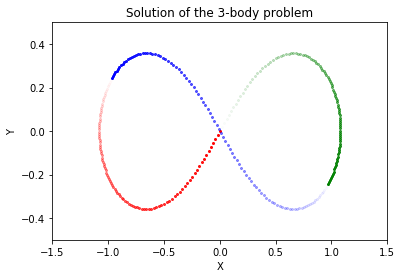

In [10]:
T = 6.32591398   # Period of the orbit
Tmax = T/3
plt.figure()
plt.title('Solution of the 3-body problem')
for t in np.linspace(0, Tmax, 100):
    inte.integrate(t)
    res = inte.y  # Retrieve current state
    alpha = 1.0 - t/Tmax
    plt.scatter(res[0], res[1], color='green', s=4, alpha=alpha)
    plt.scatter(res[2], res[3], color='blue', s=4, alpha=alpha)
    plt.scatter(res[4], res[5], color='red', s=4, alpha=alpha)
plt.xlim([-1.5, 1.5])
plt.ylim([-0.5, 0.5])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()